data

In [3]:
# Import packages
import pandas as pd 
import numpy as np
from scipy.optimize import minimize

# Write dataframe based on table 1
df = pd.DataFrame([
    ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10']
    ,['Shands', 'Orlando', 'Tampa', 'Ocala', 'The Villages', 'Daytona', 'Lakeland', 'Sebring', 'Leesburg', 'Palatka']
    , [15.2, 42.7, 5.8, 18.9, 25.4, 55.3, 12.1, 30.6, 22.8, 48.5]
    , [22.4, 8.3, 35.6, 45.2, 38.7, 28.9, 15.8, 5.2, 52.4, 42.1]
    , [450, 380, 320, 180, 150, 280, 220, 160, 190, 170]
    , [1.5, 1.2, 1.0, 0.8, 0.7, 1.0, 0.9, 0.6, 0.8, 0.7]
    ])
df = df.transpose()WE
df.columns = ['hospital_id', 'city', 'x1', 'x2', 'daily_demand_d', 'priority_weight_wi']
df

SyntaxError: invalid syntax (406592220.py, line 15)

In [ ]:
# Create variables
arr = np.array(df)
arr
# Location (a1, a2) of hospitals
a = arr[:,2:4]
# Daily demand
d = arr[:,4]
# Priority weight
w = arr[:,5]
# Epsilon
e = 0.01
# Transportation cost
c = 0.15


In [ ]:
# Objective function  
def obj_function(w,d,x,a,e,c):
    # Initialize variable
    sum = 0

    # Summation
    for i in range(0,10):
        sqrt = np.sqrt(np.sum((x-a[i])**2) + e)
        mult = w[i]*d[i]*sqrt
        sum = sum + mult
    
    # Multiplication of scalar and summation
    f = c*sum

    # Return f
    return f 

# Gradient
def gradient(w, d, x, a, e, c):
    # Initialize variable
    grad_f = np.zeros_like(x)

    # Summation
    for i in range(0,10):
        num = x - a[i]
        den = np.sqrt(np.sum((x-a[i])**2) + e)

        # error check, dividing by zero
        if den == 0:
            den = 1e-10

        mult = w[i]*d[i]*num/den
        grad_f = grad_f + mult

    # Multiplication of scalar and summation
    grad_f = c*grad_f

    # Return grad_f
    return grad_f


# Optimal step size
def step_size(w,d,x,a,e,c,grad_f):
    # Initialize n
    n = 1.0
    b = 0.01
    convergence_criterion = False
    
    x_new = x - n*grad_f

    # Loop while the objective value is not minimized from the previous x
    while obj_function(w,d,x - n*grad_f, a,e,c) > obj_function(w,d,x,a,e,c) and n>1e-10:
        # Step size 
        n = n*0.5
    
    # Return step size n
    return n
    

# Gradient descent algorithm
def gradient_descent(w,d,x,a,e,c):
    # Initialize values 
    max_iterations = 1000
    list_x = []

    # Loop until max number of iterations are done
    for i in range(max_iterations):
        # Compute gradient
        grad_f = gradient(w,d,x,a,e,c)

        # Check convergence criterion
        if np.linalg.norm(grad_f) < 1e-10:
            return x

        # Choose step size n
        n = step_size(w,d,x,a,e,c, grad_f)

        # Update x
        list_x.append(x)
        x = x - n*grad_f

    # Rturn values 
    return x, list_x


[16.597243209045985 22.992648968528197]


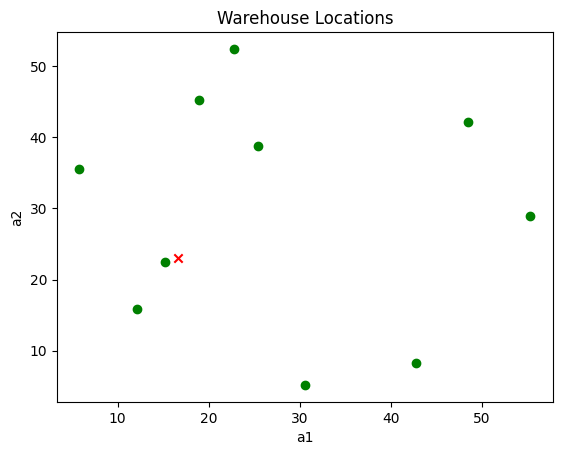

In [ ]:
# Initial point at (0,0)
x = np.array([0,0])
final_x, list_x = gradient_descent(w,d,x,a,e,c)
print(final_x)

# Import packages
import matplotlib.pyplot as plt

# Plot locations
plt.scatter(a[:,0], a[:,1], marker = 'o', color = 'green')
# Plot optimal warehouse 
plt.scatter(final_x[0], final_x[1], marker = 'x', color = 'red')
plt.xlabel('a1')
plt.ylabel('a2')
plt.title("Warehouse Locations")
plt.show()



In [ ]:
# Initial point at middle of graph 
mid_x1 = np.max(a[0]) - np.min(a[0])
mid_x2 = np.max(a[1]) - np.min(a[1])
x = np.array([mid_x1, mid_x2])
final_x, list_x = gradient_descent(w,d,x,a,e,c)
print(final_x)


[16.597243167057695 22.992649065256224]


In [ ]:
# Visualize convergence 
arr_x = np.array(list_x)
plt.plot(arr_x, marker = '-', color = 'blue')
plt.plot(final_x, marker = 'x', color = 'red')
plt.show()

NameError: name 'np' is not defined